In [196]:
from nbodykit.lab import LinearMesh, cosmology, FFTPower
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as scpimg
import nbodykit
import h5py



%matplotlib inline

In [197]:
def my_Plin(k):
    l = Plin(k)
    l[k>0.1] = 0
    return l

In [198]:
def generate_divergence(Nmesh=128, BoxSize=600, seed=42):
    cosmo = cosmology.Planck15
    Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='NoWiggleEisensteinHu')
    mesh = LinearMesh(my_Plin, Nmesh=Nmesh, BoxSize=600, seed=seed)
    density = mesh.paint(mode='real')
    
    f = cosmo.scale_independent_growth_rate(0.0)
    divergence = - 100 * cosmo.h * f * (density[...] - 1)
    
    output_filename = 'mock_divergence_mesh_{}_box_{}_seed_{}.h5'.format(Nmesh, BoxSize, seed)
    h5f = h5py.File(output_filename, 'w')
    h5f.create_dataset('divergence', data=-75*(density[...]-1))
    h5f.close()
    print("Finished writing to {}".format(output_filename))

In [211]:
for i in range(10):
    generate_divergence(Nmesh=128, BoxSize=600, seed=i)

Finished writing to mock_divergence_mesh_128_box_600_seed_0.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_1.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_2.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_3.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_4.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_5.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_6.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_7.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_8.h5
Finished writing to mock_divergence_mesh_128_box_600_seed_9.h5


In [212]:
for i in range(10):
    generate_divergence(Nmesh=256, BoxSize=320, seed=i)

Finished writing to mock_divergence_mesh_256_box_320_seed_0.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_1.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_2.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_3.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_4.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_5.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_6.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_7.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_8.h5
Finished writing to mock_divergence_mesh_256_box_320_seed_9.h5


In [213]:
f = h5py.File('mock_divergence_mesh_256_box_320_seed_5.h5', 'r')
divergence_field = f['divergence'][...]
f.close()

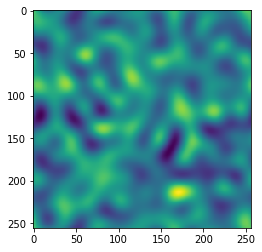

In [214]:
plt.imshow(divergence_field[:,:,10])

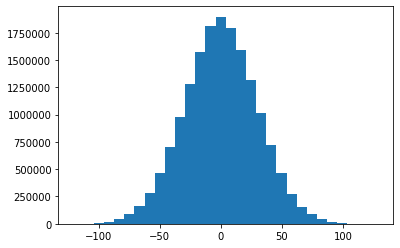

In [215]:
_ = plt.hist(divergence_field.flatten(), bins=30)

In [216]:
np.std(divergence_field)

29.798647